In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
%matplotlib inline

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

# 从硬盘读取数据进入内存
df = pd.read_excel("Molecular_Descriptor.xlsx")
df1 = pd.read_excel("ADMET.xlsx")

In [2]:
df.isnull().sum()

SMILES               0
nAcid                0
ALogP                0
ALogp2               0
AMR                  0
apol                 0
naAromAtom           0
nAromBond            0
nAtom                0
nHeavyAtom           0
nH                   0
nB                   0
nC                   0
nN                   0
nO                   0
nS                   0
nP                   0
nF                   0
nCl                  0
nBr                  0
nI                   0
nX                   0
ATSc1                0
ATSc2                0
ATSc3                0
ATSc4                0
ATSc5                0
ATSm1                0
ATSm2                0
ATSm3                0
ATSm4                0
ATSm5                0
ATSp1                0
ATSp2                0
ATSp3                0
ATSp4                0
ATSp5                0
nBase                0
BCUTw-1l             0
BCUTw-1h             0
BCUTc-1l             0
BCUTc-1h             0
BCUTp-1l             0
BCUTp-1h   

In [3]:
#方差过滤

count = 0
column = []

for j in range(df.shape[1] - 1):
    if df.iloc[:,j + 1].std() == 0:
        column.append(j + 1)

#for i in column:
df.drop(labels = df.columns[column], axis= 1, inplace = True)

In [4]:
#特征选择

import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['SMILES'],axis = 1).values
y = df1['Caco-2'].values

# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier #分类

feature_name = df.drop(['SMILES'],axis = 1).columns
rfc = RandomForestClassifier(n_estimators=60, random_state=0) # 随机森林实例化
# 训练
rfc = rfc.fit(Xtrain,Ytrain)
# 得分
score_Random_Forest = rfc.score(Xtest,Ytest)
print(score_Random_Forest)

r = [*zip(feature_name,rfc.feature_importances_)]
r.sort(key=lambda x:x[1],reverse = True)
r

0.8836424957841484


[('SP-1', 0.050668389406829016),
 ('ECCEN', 0.030434653051835434),
 ('ETA_Beta_s', 0.028284822543611452),
 ('MLFER_L', 0.027178937718015047),
 ('MW', 0.02663152616451249),
 ('SP-2', 0.02092918732503668),
 ('WTPT-1', 0.02043337717955681),
 ('sumI', 0.019953663088495537),
 ('nBonds', 0.01989267535493006),
 ('AMR', 0.017634160672924348),
 ('WPATH', 0.016799817554438757),
 ('ETA_Eta_R', 0.016371011802469793),
 ('minaaO', 0.01616651280442241),
 ('ETA_Eta_R_L', 0.013554732223244307),
 ('Kier3', 0.01350434344753455),
 ('nBonds2', 0.012386660723437252),
 ('ETA_Beta', 0.011932065419647444),
 ('SP-0', 0.01076472319473971),
 ('MLFER_S', 0.01069178119779139),
 ('SaaO', 0.010474421436615023),
 ('Zagreb', 0.010350830316939908),
 ('ATSm5', 0.010301061146938873),
 ('nHeavyAtom', 0.009996921264203503),
 ('McGowan_Volume', 0.009136399058700142),
 ('C2SP2', 0.008917017144711247),
 ('Kier1', 0.008781937053150083),
 ('ATSm3', 0.008776334417744787),
 ('VP-0', 0.008510252841584628),
 ('maxaaO', 0.00844663399

In [5]:
#特征个数选择

count = []

for i in range(60):
    count.append(r[i][0])

count

['SP-1',
 'ECCEN',
 'ETA_Beta_s',
 'MLFER_L',
 'MW',
 'SP-2',
 'WTPT-1',
 'sumI',
 'nBonds',
 'AMR',
 'WPATH',
 'ETA_Eta_R',
 'minaaO',
 'ETA_Eta_R_L',
 'Kier3',
 'nBonds2',
 'ETA_Beta',
 'SP-0',
 'MLFER_S',
 'SaaO',
 'Zagreb',
 'ATSm5',
 'nHeavyAtom',
 'McGowan_Volume',
 'C2SP2',
 'Kier1',
 'ATSm3',
 'VP-0',
 'maxaaO',
 'ETA_Alpha',
 'apol',
 'ETA_Eta_F_L',
 'VP-1',
 'ATSm2',
 'naaO',
 'Kier2',
 'ATSp1',
 'nC',
 'nwHBa',
 'ATSp2',
 'FMF',
 'TopoPSA',
 'SP-7',
 'CrippenMR',
 'MDEC-22',
 'MLFER_BH',
 'nBondsS',
 'ETA_Beta_ns',
 'MDEC-12',
 'VC-5',
 'BCUTp-1l',
 'minwHBa',
 'ATSc1',
 'ETA_Shape_P',
 'nAtom',
 'MDEC-23',
 'SHBd',
 'WTPT-3',
 'SCH-5',
 'ETA_EtaP']

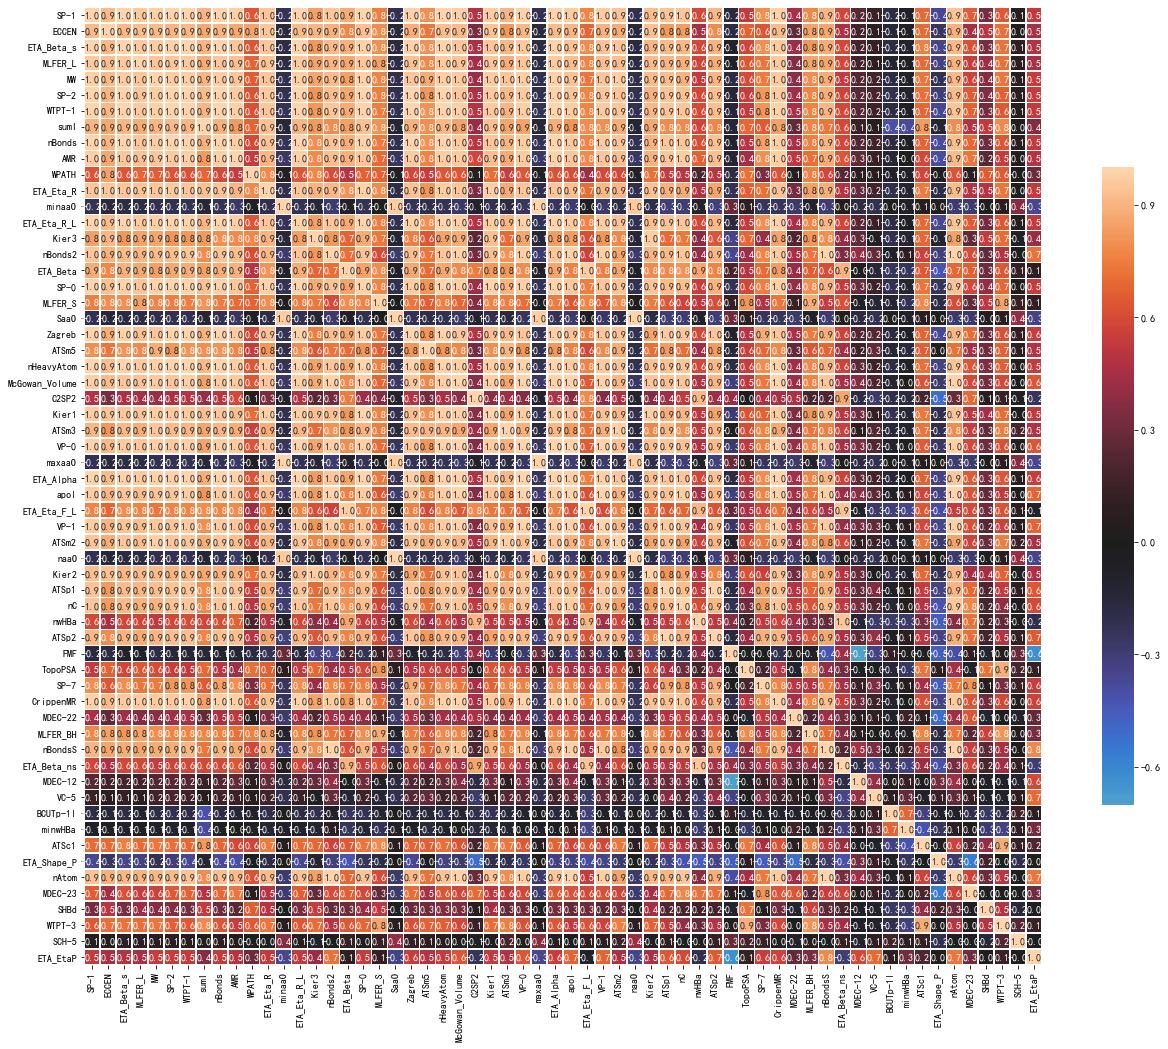

In [6]:
import seaborn as sns

plt.figure(figsize=(18,18))
sns.heatmap(df[count].corr(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='.1f')
plt.savefig("01.png")
plt.tight_layout()

In [7]:
df.std()

nAcid                   0.347900
ALogP                   1.434250
ALogp2                 12.832917
AMR                    31.567455
apol                   19.449748
naAromAtom              5.155854
nAromBond               5.635271
nAtom                  18.089182
nHeavyAtom              8.073881
nH                     10.775491
nC                      6.631359
nN                      1.886457
nO                      1.599325
nS                      0.562536
nP                      0.031822
nF                      0.765680
nCl                     0.362830
nBr                     0.254292
nI                      0.071128
nX                      0.862090
ATSc1                   0.236304
ATSc2                   0.139729
ATSc3                   0.098950
ATSc4                   0.146599
ATSc5                   0.153497
ATSm1                  15.633013
ATSm2                  10.141272
ATSm3                  14.131973
ATSm4                  15.749119
ATSm5                  18.067086
ATSp1     

In [8]:
#将数据划分为标签和特征

X = df[count].values
y = df1['Caco-2'].values

# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier #分类

feature_name = df[count].columns
rfc = RandomForestClassifier(n_estimators=60, random_state=0) # 随机森林实例化
# 训练
rfc = rfc.fit(Xtrain,Ytrain)
# 得分
score_Random_Forest = rfc.score(Xtest,Ytest)
print(score_Random_Forest)

0.9005059021922428


In [9]:
y_predict = rfc.predict(Xtest)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R-squared value of rfc is', rfc.score(Xtest, Ytest))
print('The mean squared error of rfc is', mean_squared_error(Ytest, y_predict))
print('The mean absoluate error of rfc is', mean_absolute_error(Ytest, y_predict))

R-squared value of rfc is 0.9005059021922428
The mean squared error of rfc is 0.09949409780775717
The mean absoluate error of rfc is 0.09949409780775717


In [10]:
# 依然使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。

from sklearn.metrics import classification_report
print (classification_report(Ytest, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       354
           1       0.92      0.82      0.87       239

    accuracy                           0.90       593
   macro avg       0.90      0.89      0.89       593
weighted avg       0.90      0.90      0.90       593



In [11]:
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

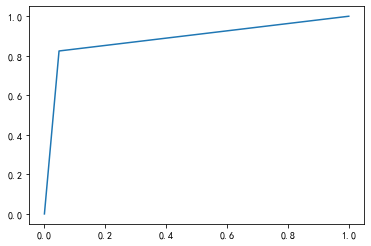

In [12]:
#ROC曲线
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thres = roc_curve(Ytest, y_predict)
plt.plot(fpr, tpr)
plt.show()

In [14]:
#AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Ytest, y_predict)
score

0.888122591778361